# **Оптимизаторы**

- ## Теория

## 1. Доступные оптимизаторы в tensorflow.keras:
- SGD
- RMSProp
- Adam
- AdamW
- Adadelta 
- Adagrad
- Adamax
- Adafactor
- Nadam
- Ftrl

Рассмотрим каждый из оптимизаторов отдельно

### 1. SGD
- СУТЬ: обновление весовых коэффициентов нейронной сети с использованием единственного примера i обучающей выборки на каждом шаге.
- ПРЕИМУЩЕСТВА:
    - Не производит лишних вычислений (в отличие от классического градиентного спуска)
- НЕДОСТАТКИ:
    - Может быть медленным на большом количестве данных обучения
    - Застревает в локальных оптимумах
    - Сильно колеблется во время обучения
    - Сложно подобрать оптимальные параметры: слишком маленькие будут замедлять обучение, слишком большие будут препятствовать сходимости
    
Чтобы эти минусы исправить, необходимо понижать скорость обучения модели, но это явно не эффективно (проигрывает другим оптимизаторам)

**ВЫВОД**: скорее всего, на больших данных он сработает плохо, но возможно стоит проверить

Далее будут описаны оптимизаторы, друг из друга вытекающие

### 2.  Adagrad (адаптивный градиент)
- СУТЬ: адаптация SGD: алгоритм уменьшает обновления для элементов, которые и так часто обновляются, и увеличивает обновления для параметров, которые почти не обновлялись.
- ПРЕИМУЩЕСТВА:
    - исключает необходимость изменения скорости обучения вручную (как это было в SGD)
- НЕДОСТАТКИ:
    - Накопление суммы квадратов градиентов, отчего уменьшается коэффициент обучения, и в итоге процесс обучения останавливается

**Вывод**: неэффективный оптимизатор, дальнейшие его улучшения покажут себя лучше

### 3. RMSProp
- СУТЬ: расширение AdaGrad, где адаптируется размер шага индивидуально для каждого веса, чтобы модель не привыкала к определенным параметрам. Нормы градиентов не просто складываются, а усредняются в скользящем режиме.
- ПРЕИМУЩЕСТВА:
    - Эффективнее AdaGrad
    - Тоже не требует ручной настройки скорости обучения
- НЕДОСТАТКИ:
    - Новых недостатков относительно AdaGrad не возникает

**Вывод**: стоит проверить на практике

### 4. Adadelta
- СУТЬ: расширение AdaGrad, в котором вместо суммы градиентов сохраняется усредненный квадрат истории градиента, чтобы избежать замедления обучения
- ПРЕИМУЩЕСТВА:
    - Эффективнее AdaGrad
    - Тоже не требует ручной настройки скорости обучения
- НЕДОСТАТКИ:
    - Новых недостатков относительно AdaGrad не возникает

**Вывод**: стоит проверить на практике

### 5. Adam
- СУТЬ: Adam = Momentum(метод моментов для ускорения процесса обучения) + RMSprop.
- ПРЕИМУЩЕСТВА:
    - Включает в себя все достоинства вышеперечисленных оптимизаторов
    - Часто используется на практике
- НЕДОСТАТКИ:
    - Может требоваться большой объём памяти, так как Adam нужно много различных параметров
    - Чтобы восстановить модель из чекпоинта, необходимо сохранять не только веса модели, но и накопленные параметры Adam, чтобы он не считал их заново
    
**Вывод**: скорее всего, этот оптимизатор будет показывать себя лучше остальных. Стоит проверить на практике.

### 6. Adamax
- СУТЬ: вариант оптимизации по Adam, но без ограничений по норме

Благодаря способности регулировать скорость обучения на основе характеристик данных, он подходит для изучения изменяющегося во времени процесса, например, речевых данных с динамически изменяющимися шумовыми условиями. 

**Вывод**: скорее всего, этот вариант нам не подойдет

### 7. AdamW
- СУТЬ: добавление l2-регуляризации к adam

**Вывод**: Этот оптимизатор работает не лучше adam. В данной ситуации регуляризация работает хуже, чем для SGD. Тем более, показательно, что этот оптимизатор почти не используется на практике.

### 8. Adafactor
- СУТЬ: то же самое, что adam, но затрачивает меньше памяти, потому что сохраняет только частичную информацию о предыдущих градиентах

**Вывод**: стоит проверить на практике: затрата меньшего количества памяти звучит хорошо

### 9. Nadam
- СУТЬ: развитие оптимизатора Adam – добавление момента Нестерова при вычислении градиентов.

**Вывод**: стоит проверить на практике, потому что очевидных минусов у этого оптимизатора нет

### 10. Ftrl

Разработан в Google для прогнозирования рейтинга кликов в начале 2010-х годов. Он больше всего подходит для неглубоких моделей с большими и разреженными пространственными элементами.

**Вывод**: этот оптимизатор не будет показывать себя хорошо на больших данных, поэтому он нам вряд ли подходит

## Вывод: 

Были выбраны следующие оптимизаторы для проверки на практике: SGD, RMSProp, AdaDelta, Adam, Adafactor, Nadam.

 ## 2. Рассмотрим параметры выбранных оптимизаторов:

### 1. SGD
Самые важные параметры:
- Learning Rate
- Momentum
- Nesterov

### 2. RMSProp
Самые важные параметры:
- Learning Rate
- RHO (его лучше оставить дефолтным)
- Momentum

### 3. AdaDelta
Самые важные параметры:
- Learning Rate
- RHO

### 4. Adam
Самые важные параметры:
- Learning Rate
- beta_1 (лучше дефолтный)
- beta_2 (лучше дефолтный)

### 5. AdaFactor
Самые важные параметры:
- Learning Rate

### 6. Nadam
Самые важные параметры:
- Learning Rate
- beta_1 (лучше дефолтный)
- beta_2 (лучше дефолтный)

Learning Rate играет огромную роль в любом оптимизаторе. Его эффективнее писать не через floating point, a через LearningRateSchedule.

Другие параметры в основном не играют большой роли, кроме momentum в SGD и RMSProp и nesterov в SGD (фактически это ещё один оптимизатор NAG, который должен работать лучше обычного SGD).

## 3. Напишем модели, которые покажут каждый оптимизатор на практике

Проведем несколько экспериментов:
1. Оптимизаторы в чистом виде, без измененных параметров
2. Каждый оптимизатор с измененными параметрами
3. Добавление регуляризации весов

Напишем саму модель

In [6]:
# ! pip install torchvision
! pip install -r "..//..//requirements.txt" 

     ---------------------------------------- 1.7/1.7 MB 2.8 MB/s eta 0:00:00
  Using cached livelossplot-0.5.5-py3-none-any.whl (22 kB)
     ---------------------------------------- 14.6/14.6 MB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 10.4/10.4 MB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 8.3/8.3 MB 4.2 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 4.5 MB/s eta 0:00:00
     -------------------------------------- 736.6/736.6 kB 3.9 MB/s eta 0:00:00
     -------------------------------------- 293.3/293.3 kB 4.6 MB/s eta 0:00:00
     ---------------------------------------- 7.6/7.6 MB 6.2 MB/s eta 0:00:00
  Using cached bokeh-3.1.0-py3-none-any.whl (8.3 MB)
     -------------------------------------- 502.3/502.3 kB 4.5 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 3.1 MB/s eta 0:00:00
     -------------

In [1]:
import sys

import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf
import tensorflow_addons as tfa
import torchvision as tv
import matplotlib.pyplot as plt

from livelossplot import PlotLossesKeras

sys.path.append('../../')

from core.datasets import get_ds
from core.make_answer import make_ans_file

d:\ml\project\.conda\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [2]:
transformer = tv.transforms.Compose([
    tv.transforms.RandomPosterize(bits=6, p=0.4),
    tv.transforms.RandomAffine(degrees=(-15, 15), translate=(0, 0.1), scale=(0.85, 1))
])
# аугментация 4-я по accuracy

In [3]:
train_ds, val_ds, test_ds = get_ds('repaired_data_train', 'repaired_data_test', transform=transformer, batch_size=100, one_hot=True, back=2)

MemoryError: Unable to allocate 1.06 GiB for an array with shape (46499, 32, 32, 3) and data type int64

In [5]:
plt.figure(figsize=(12, 15))
train_ds_visualization = train_ds[0]
for i in range(20):
    plt.subplot(5, 4, i + 1)
    img = np.array(Image.fromarray((train_ds_visualization[0][i] * 255).astype(np.uint8), 'RGB'))
    plt.imshow(img / 255, cmap=plt.cm.binary)
    plt.title(np.argmax(train_ds_visualization[1][i]))
    plt.axis('off')
plt.show()

NameError: name 'train_ds' is not defined

<Figure size 1200x1500 with 0 Axes>

In [5]:
def new_model():
    model = tf.keras.Sequential([
    tf.keras.Input(shape=(32, 32, 3), batch_size=512),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.AveragePooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.AveragePooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0,2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10),
    ])
    return model

Первым делом проверим каждый оптимизатор без параметров

In [6]:
history_all = {}

metrics = ['categorical_accuracy',
           tfa.metrics.F1Score(num_classes=10, average='macro', name='f1_score')]

model = new_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (512, 30, 30, 32)         896       
                                                                 
 conv2d_1 (Conv2D)           (512, 28, 28, 64)         18496     
                                                                 
 batch_normalization (BatchN  (512, 28, 28, 64)        256       
 ormalization)                                                   
                                                                 
 average_pooling2d (AverageP  (512, 14, 14, 64)        0         
 ooling2D)                                                       
                                                                 
 conv2d_2 (Conv2D)           (512, 12, 12, 128)        73856     
                                                                 
 average_pooling2d_1 (Averag  (512, 6, 6, 128)         0

In [7]:
def learning(optimizer, ep):
    tf.random.set_seed(1234)
    np.random.seed(1234)
    
    metrics = ['categorical_accuracy',
           tfa.metrics.F1Score(num_classes=10, average='macro', name='f1_score')]
    callbacks = [PlotLossesKeras()]

    model = new_model()
    model.compile(optimizer=tfa.optimizers.MovingAverage(optimizer), loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=metrics)
    
    return model.fit(train_ds, epochs=ep, validation_data=val_ds, callbacks=callbacks, verbose=1)

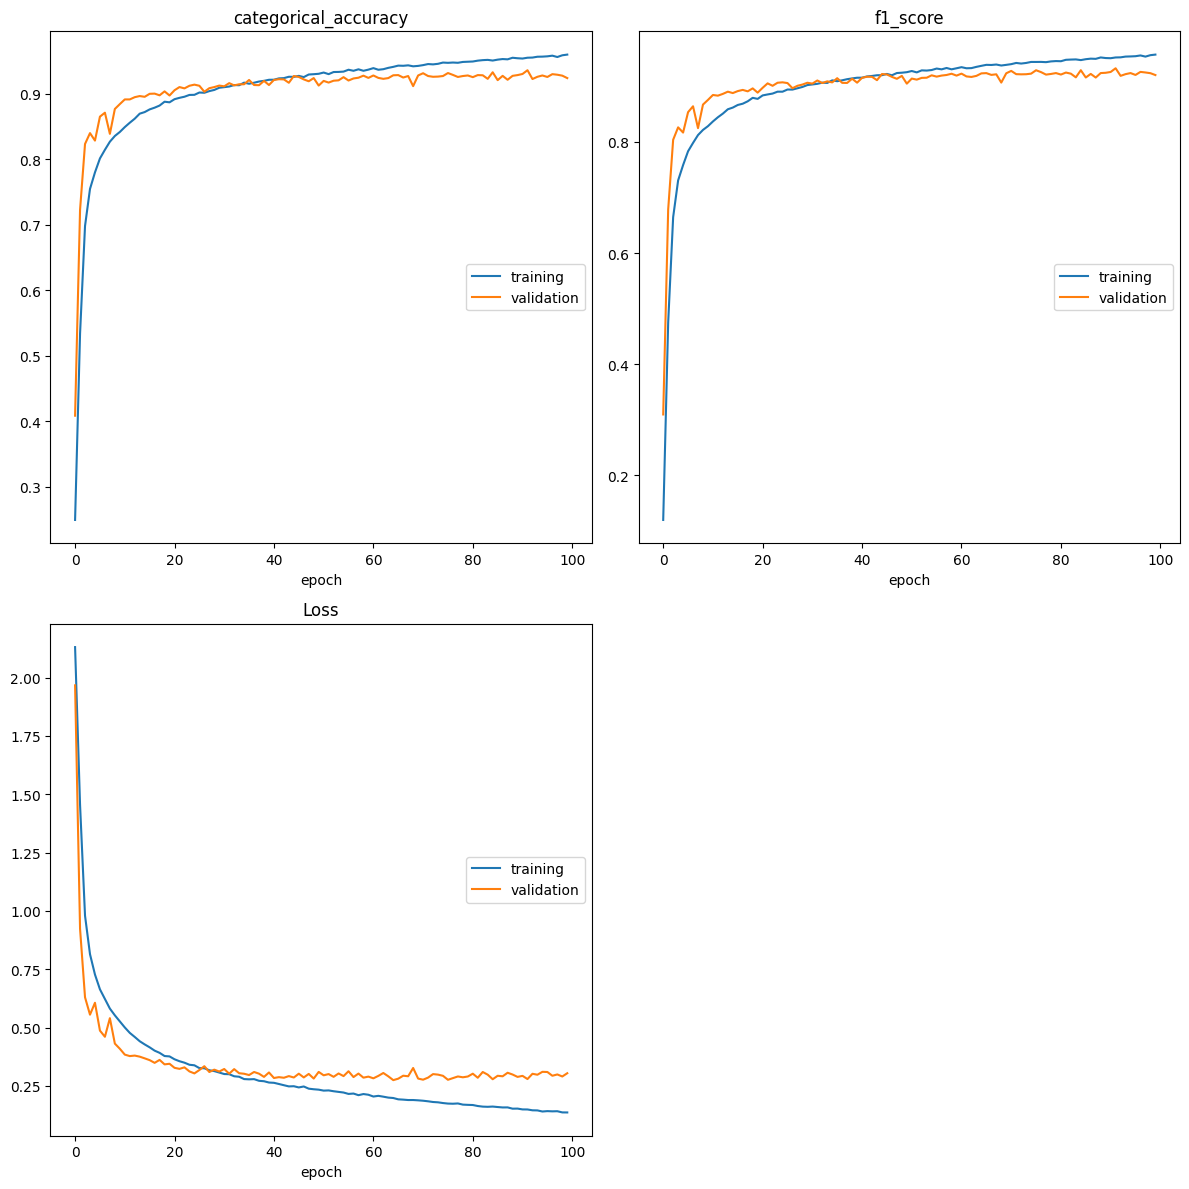

categorical_accuracy
	training         	 (min:    0.250, max:    0.960, cur:    0.960)
	validation       	 (min:    0.409, max:    0.936, cur:    0.924)
f1_score
	training         	 (min:    0.120, max:    0.957, cur:    0.957)
	validation       	 (min:    0.310, max:    0.933, cur:    0.920)
Loss
	training         	 (min:    0.136, max:    2.130, cur:    0.136)
	validation       	 (min:    0.275, max:    1.966, cur:    0.304)
465/465 [==============================] - 97s 209ms/step - loss: 0.1362 - categorical_accuracy: 0.9599 - f1_score: 0.9571 - val_loss: 0.3043 - val_categorical_accuracy: 0.9240 - val_f1_score: 0.9203


In [9]:
# SGD
epochs = 100
optimizer = tf.keras.optimizers.legacy.SGD()
history_all['sgd'] = learning(optimizer, epochs)

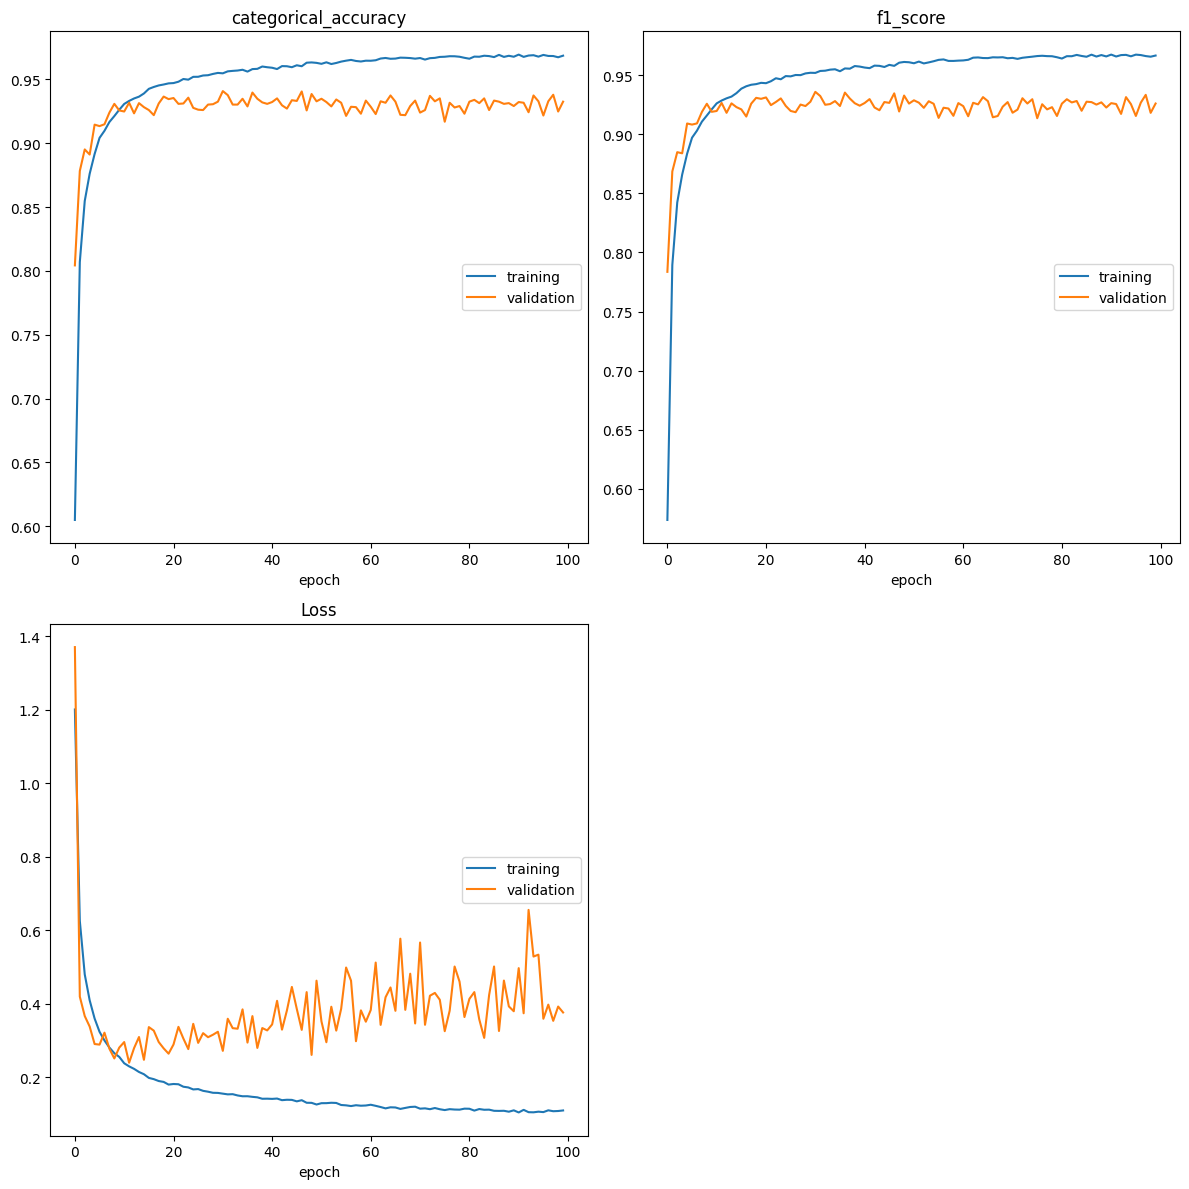

categorical_accuracy
	training         	 (min:    0.605, max:    0.969, cur:    0.969)
	validation       	 (min:    0.804, max:    0.941, cur:    0.933)
f1_score
	training         	 (min:    0.574, max:    0.967, cur:    0.967)
	validation       	 (min:    0.784, max:    0.936, cur:    0.926)
Loss
	training         	 (min:    0.104, max:    1.201, cur:    0.110)
	validation       	 (min:    0.240, max:    1.371, cur:    0.377)
465/465 [==============================] - 101s 216ms/step - loss: 0.1099 - categorical_accuracy: 0.9686 - f1_score: 0.9666 - val_loss: 0.3766 - val_categorical_accuracy: 0.9326 - val_f1_score: 0.9260


In [12]:
# RMSProp
epochs = 100
optimizer = tf.keras.optimizers.legacy.RMSprop()
history_all['rmsprop'] = learning(optimizer, epochs)

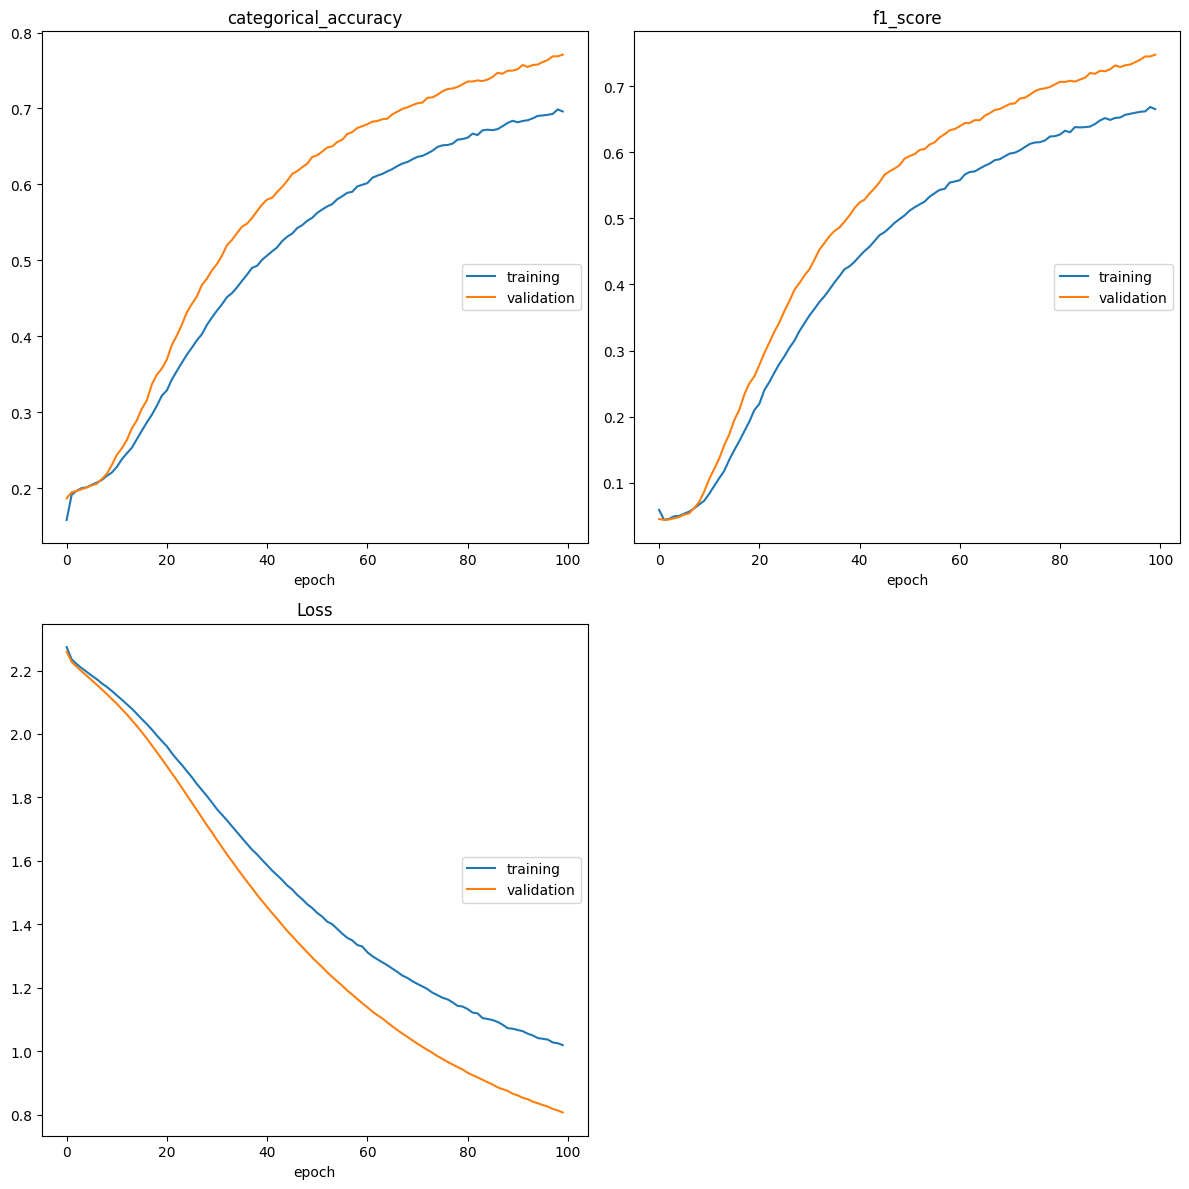

categorical_accuracy
	training         	 (min:    0.158, max:    0.699, cur:    0.696)
	validation       	 (min:    0.187, max:    0.771, cur:    0.771)
f1_score
	training         	 (min:    0.044, max:    0.668, cur:    0.665)
	validation       	 (min:    0.044, max:    0.748, cur:    0.748)
Loss
	training         	 (min:    1.019, max:    2.274, cur:    1.019)
	validation       	 (min:    0.807, max:    2.260, cur:    0.807)
465/465 [==============================] - 103s 221ms/step - loss: 1.0191 - categorical_accuracy: 0.6960 - f1_score: 0.6652 - val_loss: 0.8067 - val_categorical_accuracy: 0.7709 - val_f1_score: 0.7477


In [19]:
# Adadelta
epochs = 100
optimizer = tf.keras.optimizers.legacy.Adadelta()
history_all['adadelta'] = learning(optimizer, epochs)

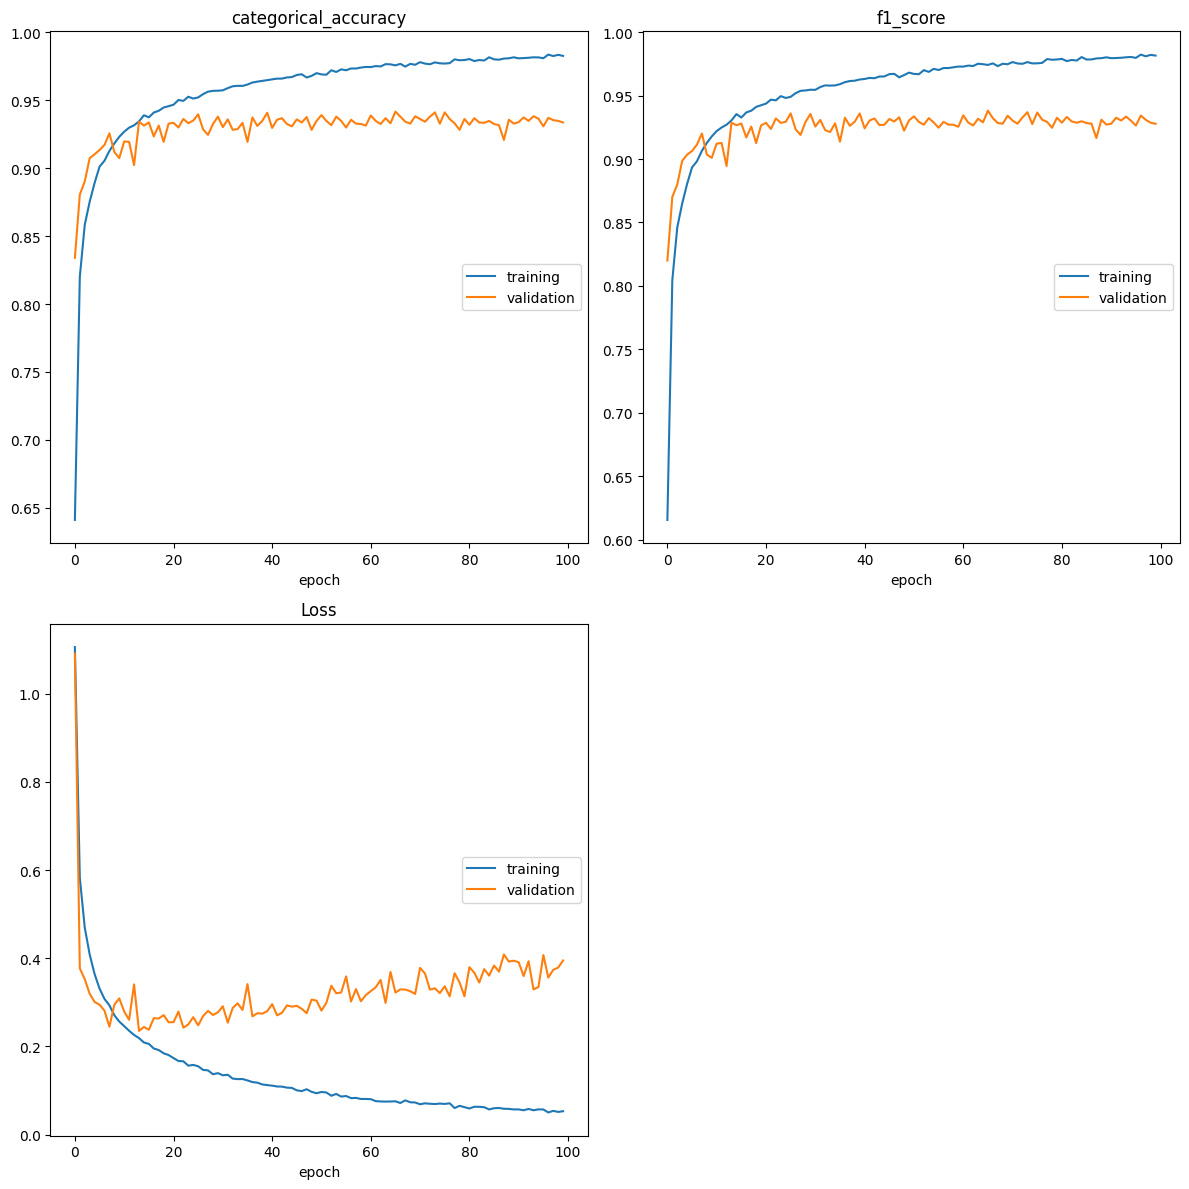

categorical_accuracy
	training         	 (min:    0.641, max:    0.984, cur:    0.983)
	validation       	 (min:    0.834, max:    0.942, cur:    0.934)
f1_score
	training         	 (min:    0.615, max:    0.982, cur:    0.982)
	validation       	 (min:    0.820, max:    0.938, cur:    0.928)
Loss
	training         	 (min:    0.050, max:    1.106, cur:    0.053)
	validation       	 (min:    0.235, max:    1.091, cur:    0.395)
465/465 [==============================] - 97s 208ms/step - loss: 0.0532 - categorical_accuracy: 0.9828 - f1_score: 0.9816 - val_loss: 0.3950 - val_categorical_accuracy: 0.9337 - val_f1_score: 0.9278


In [20]:
# Adam
epochs = 100
optimizer = tf.keras.optimizers.legacy.Adam()
history_all['adam'] = learning(optimizer, epochs)

In [ ]:
optimizer = tf.keras.optimizers.legacy.Adafactor(),
history_all['rmsprop'] = learning(optimizer, epochs)

Попробую использовать lr_scheduler двух видов - экспоненциальное уменьшение и OneCycleLR

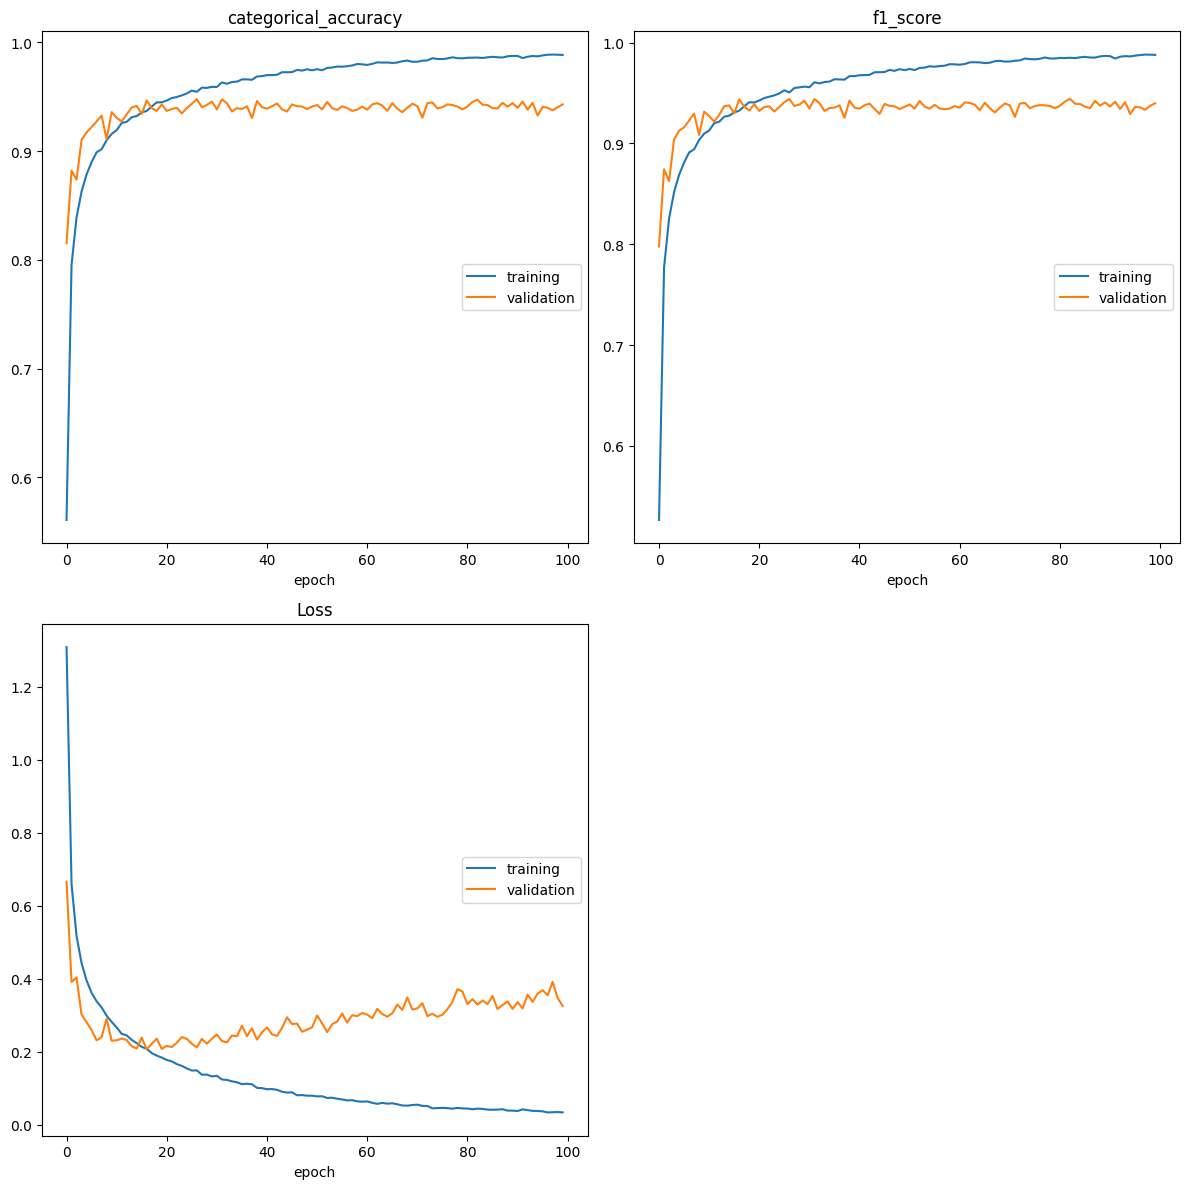

categorical_accuracy
	training         	 (min:    0.561, max:    0.989, cur:    0.988)
	validation       	 (min:    0.815, max:    0.948, cur:    0.943)
f1_score
	training         	 (min:    0.527, max:    0.988, cur:    0.988)
	validation       	 (min:    0.798, max:    0.944, cur:    0.940)
Loss
	training         	 (min:    0.034, max:    1.308, cur:    0.034)
	validation       	 (min:    0.207, max:    0.666, cur:    0.326)
465/465 [==============================] - 101s 217ms/step - loss: 0.0344 - categorical_accuracy: 0.9883 - f1_score: 0.9878 - val_loss: 0.3259 - val_categorical_accuracy: 0.9429 - val_f1_score: 0.9397


In [10]:
epochs = 100
optimizer = tf.keras.optimizers.legacy.SGD(momentum=0.9)
history_all['momentum'] = learning(optimizer, epochs)

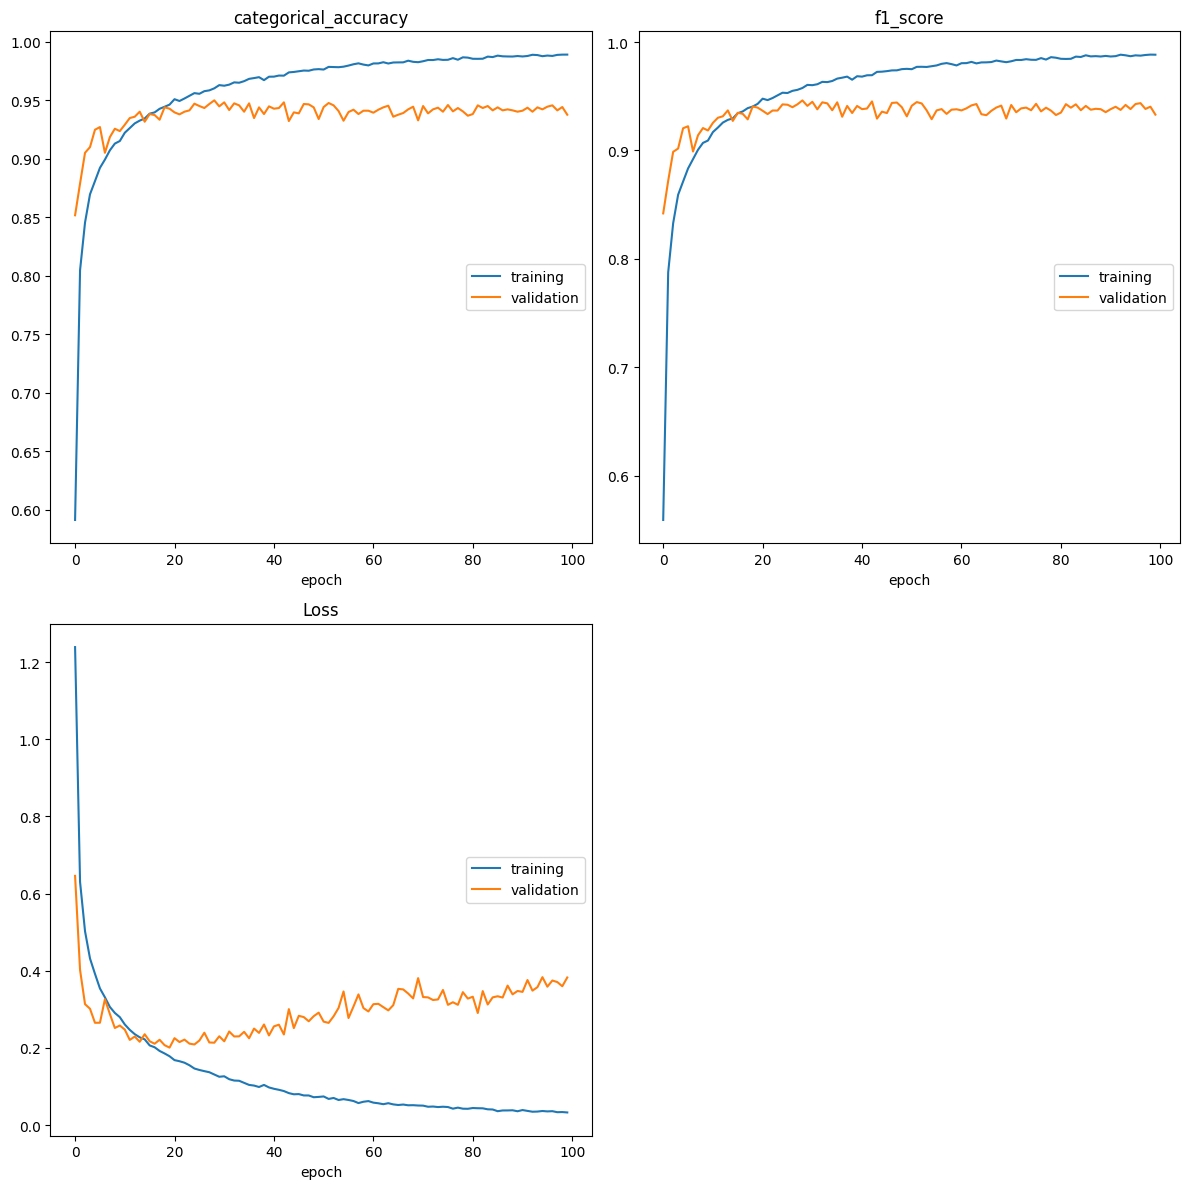

categorical_accuracy
	training         	 (min:    0.591, max:    0.989, cur:    0.989)
	validation       	 (min:    0.852, max:    0.950, cur:    0.938)
f1_score
	training         	 (min:    0.559, max:    0.988, cur:    0.988)
	validation       	 (min:    0.842, max:    0.946, cur:    0.933)
Loss
	training         	 (min:    0.033, max:    1.239, cur:    0.033)
	validation       	 (min:    0.201, max:    0.646, cur:    0.382)
465/465 [==============================] - 112s 240ms/step - loss: 0.0325 - categorical_accuracy: 0.9891 - f1_score: 0.9883 - val_loss: 0.3825 - val_categorical_accuracy: 0.9377 - val_f1_score: 0.9330


In [12]:
epochs = 100
optimizer = tf.keras.optimizers.legacy.SGD(momentum=0.9, nesterov=True)
history_all['nesterov'] = learning(optimizer, epochs)

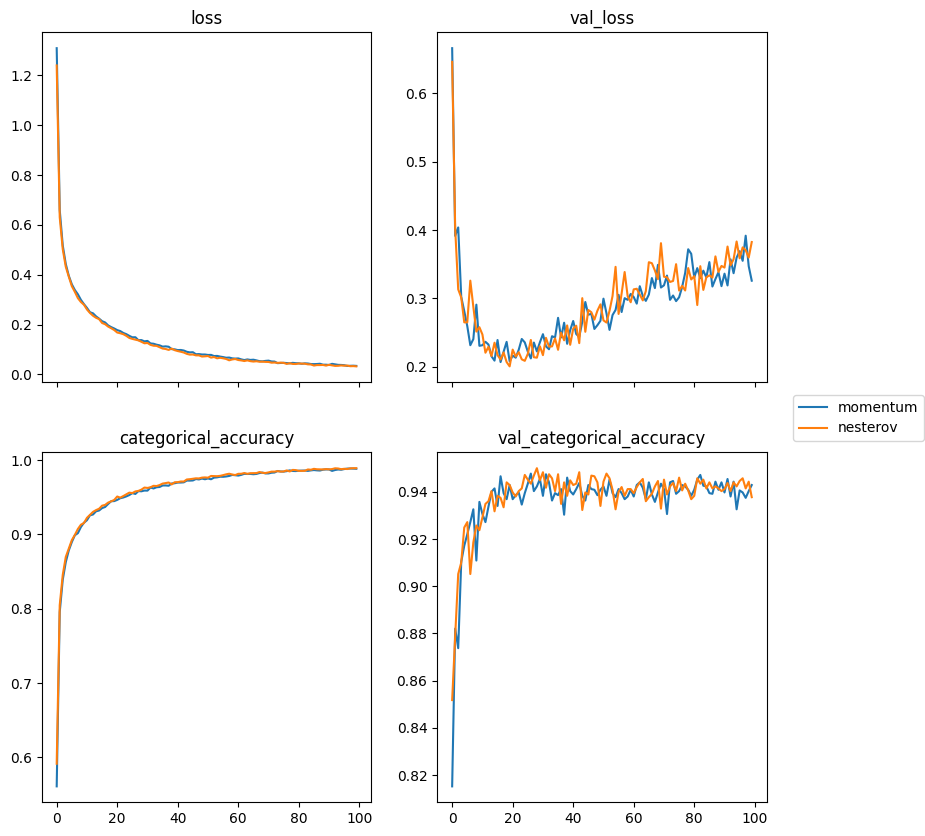

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(10,10), sharex='col')
ax[0, 0].set_title("loss")
ax[0, 1].set_title("val_loss")
ax[1, 0].set_title("categorical_accuracy")
ax[1, 1].set_title("val_categorical_accuracy")

lines, labels = [], []
for optimizer_name in history_all:
    history = history_all[optimizer_name]
    ax[0, 0].plot(history.history['loss'])
    ax[0, 1].plot(history.history['val_loss'])
    ax[1, 0].plot(history.history['categorical_accuracy'])
    line = ax[1, 1].plot(history.history['val_categorical_accuracy'])
    lines.append(line[0])
    labels.append(optimizer_name)

fig.legend(lines,labels, loc='center right', borderaxespad=0.1)
plt.subplots_adjust(right=0.85)

In [44]:
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    return lr * tf.math.exp(-0.03)

In [45]:
def learning_with_lr(optimizer, ep):
    tf.random.set_seed(1234)
    np.random.seed(1234)


    metrics = ['categorical_accuracy',
           tfa.metrics.F1Score(num_classes=10, average='macro', name='f1_score')]
    callbacks = [PlotLossesKeras(), tf.keras.callbacks.LearningRateScheduler(scheduler)]

    model = new_model()
    model.compile(optimizer=tfa.optimizers.MovingAverage(optimizer), loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=metrics)
    
    return model.fit(train_ds, epochs=ep, validation_data=val_ds, callbacks=callbacks, verbose=1)

In [1]:
epochs = 100
optimizer = tf.keras.optimizers.legacy.RMSprop()
history_all['rmsprop_lr'] = learning_with_lr(optimizer, epochs)

NameError: name 'tf' is not defined

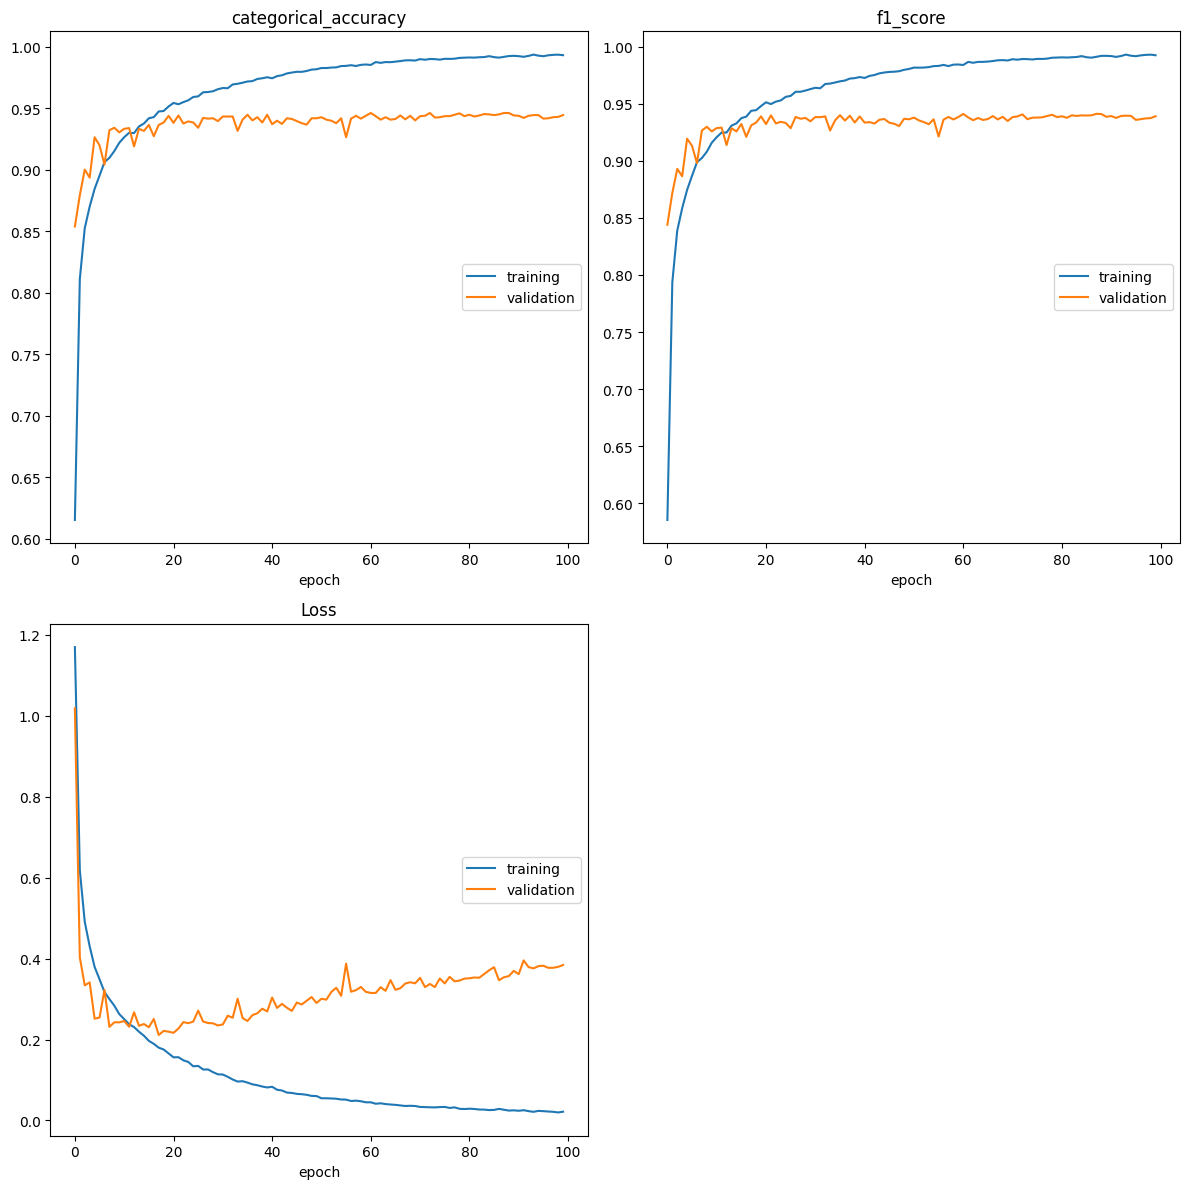

categorical_accuracy
	training         	 (min:    0.615, max:    0.993, cur:    0.993)
	validation       	 (min:    0.854, max:    0.946, cur:    0.944)
f1_score
	training         	 (min:    0.586, max:    0.993, cur:    0.992)
	validation       	 (min:    0.844, max:    0.941, cur:    0.939)
Loss
	training         	 (min:    0.020, max:    1.170, cur:    0.022)
	validation       	 (min:    0.211, max:    1.019, cur:    0.384)
465/465 [==============================] - 139s 297ms/step - loss: 0.0218 - categorical_accuracy: 0.9930 - f1_score: 0.9924 - val_loss: 0.3842 - val_categorical_accuracy: 0.9443 - val_f1_score: 0.9390 - lr: 6.7205e-05


In [47]:
epochs = 100
optimizer = tf.keras.optimizers.legacy.Adam()
history_all['adam_lr'] = learning_with_lr(optimizer, epochs)

In [ ]:
epochs = 100
optimizer = tf.keras.optimizers.legacy.SGD(momentum=0.9)
history_all['momentum_lr'] = learning_with_lr(optimizer, epochs)

Epoch 1/100
 15/465 [..............................] - ETA: 1:34 - loss: 2.2813 - categorical_accuracy: 0.1707 - f1_score: 0.0762

KeyboardInterrupt: 

In [ ]:
epochs = 100
optimizer = tf.keras.optimizers.legacy.SGD(momentum=0.9, nesterov=True)
history_all['nesterov_lr'] = learning_with_lr(optimizer, epochs)

In [50]:
from onecycle import OneCycleLR

def learning_with_onecycle(optimizer, ep):
    tf.random.set_seed(1234)
    np.random.seed(1234)
    

    lr_manager = OneCycleLR(num_samples=len(train_ds), batch_size=100, max_lr=0.01, 
                            end_percentage=0.1, scale_percentage=None, 
                            maximum_momentum=0.95, minimum_momentum=0.85)

    metrics = ['categorical_accuracy',
           tfa.metrics.F1Score(num_classes=10, average='macro', name='f1_score')]
    callbacks = [PlotLossesKeras(), lr_manager]

    model = new_model()
    model.compile(optimizer=tfa.optimizers.MovingAverage(optimizer), loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=metrics)
    
    return model.fit(train_ds, epochs=ep, validation_data=val_ds, callbacks=callbacks, verbose=1)

In [ ]:
epochs = 100
optimizer = tf.keras.optimizers.legacy.SGD()
print(hasattr(optimizer, 'momentum'))
history_all['sgd_onecycle'] = learning_with_onecycle(optimizer, epochs)

ValueError: Momentum can be updated only on SGD optimizer !